# (Ford GoBike System Data)
## by (Ghadi Alowaimer)

## Table of Contents
- [Preliminary Wrangling](#Wrangling)
- [Univariate Exploration](#Univariate)
- [Bivariate Exploration](#Bivariate)
- [Multivariate Exploration](#Multivariate)

<a id='Wrangling'></a>
## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

In [2]:
# loading datasets for the year 2018
df_jan_month = pd.read_csv('201801-fordgobike-tripdata.csv')
df_feb_month = pd.read_csv('201802-fordgobike-tripdata.csv')
df_mar_month = pd.read_csv('201803-fordgobike-tripdata.csv')
df_apr_month = pd.read_csv('201804-fordgobike-tripdata.csv')
df_may_month = pd.read_csv('201805-fordgobike-tripdata.csv')
df_june_month = pd.read_csv('201806-fordgobike-tripdata.csv')
df_july_month = pd.read_csv('201807-fordgobike-tripdata.csv')
df_aug_month = pd.read_csv('201808-fordgobike-tripdata.csv')
df_sept_month = pd.read_csv('201809-fordgobike-tripdata.csv')
df_oct_month = pd.read_csv('201810-fordgobike-tripdata.csv')
df_nov_month = pd.read_csv('201811-fordgobike-tripdata.csv')
df_dec_month = pd.read_csv('201812-fordgobike-tripdata.csv')

In [3]:
# add month column for each dataset
df_jan_month = df_jan_month.assign(month='Jan')
df_feb_month = df_feb_month.assign(month='Feb')
df_mar_month = df_mar_month.assign(month='Mar')
df_apr_month = df_apr_month.assign(month='Apr')
df_may_month = df_may_month.assign(month='May')
df_june_month = df_june_month.assign(month='June')
df_july_month = df_july_month.assign(month='July')
df_aug_month = df_aug_month.assign(month='Aug')
df_sept_month = df_sept_month.assign(month='Sept')
df_oct_month = df_oct_month.assign(month='Oct')
df_nov_month = df_nov_month.assign(month='Nov')
df_dec_month = df_dec_month.assign(month='Dec')

In [4]:
# Joining all the datasets together
df = pd.concat([df_jan_month, df_feb_month, df_mar_month, df_apr_month, df_may_month, df_june_month, df_july_month, df_aug_month, df_sept_month, df_oct_month, df_nov_month, df_dec_month])

In [5]:
# Checking that it works as expected
df['month'].value_counts()

Oct     201458
July    199222
June    195968
Aug     192162
Sept    186217
May     179125
Nov     134135
Dec     131363
Apr     131169
Mar     111382
Feb     106718
Jan      94802
Name: month, dtype: int64

In [6]:
print(df.shape)

(1863721, 15)


In [7]:
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
month                       object
dtype: object


In [8]:
print(df.head(10))

   duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:58:31.0530   
5          6477  2018-01-31 22:58:44.8670  2018-02-01 00:46:41.9080   
6           453  2018-01-31 23:53:53.6320  2018-02-01 00:01:26.8050   
7           180  2018-01-31 23:52:09.9030  2018-01-31 23:55:10.8070   
8           996  2018-01-31 23:34:56.0040  2018-01-31 23:51:32.6740   
9           825  2018-01-31 23:34:14.0270  2018-01-31 23:47:59.8090   

   start_station_id                                 start_station_name  \
0             120.0                               Mission Dolores Park   
1              15.0  San Francisco Ferry Building (Harry Bridges Pl...

In [9]:
print(df.describe())

       duration_sec  start_station_id  start_station_latitude  \
count  1.863721e+06      1.851950e+06            1.863721e+06   
mean   8.573026e+02      1.196744e+02            3.776678e+01   
std    2.370379e+03      1.003976e+02            1.057689e-01   
min    6.100000e+01      3.000000e+00            3.726331e+01   
25%    3.500000e+02      3.300000e+01            3.777106e+01   
50%    5.560000e+02      8.900000e+01            3.778107e+01   
75%    8.720000e+02      1.860000e+02            3.779625e+01   
max    8.636600e+04      3.810000e+02            4.551000e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             1.863721e+06    1.851950e+06          1.863721e+06   
mean             -1.223492e+02    1.181730e+02          3.776690e+01   
std               1.654634e-01    1.004403e+02          1.056483e-01   
min              -1.224737e+02    3.000000e+00          3.726331e+01   
25%              -1.224114e+02    3.000000e+01        

### What is the structure of your dataset?

> The dataset includes 1863721 trips with 15 features ( trip duration, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, bike share for all trip, month ). Most variables are numeric in nature, but the variables start time, end time, start station name, end station name, user type, bike share for all trip and month  are string object
  
### What is/are the main feature(s) of interest in your dataset?

> 1.What is the average duration of the trips? 

> 2.What is the distribution of the user type  variable?

> 3.What is the relationship between all numeric variables?

> 4.Most frequent month for both subscriber and customer?

> 5.Relationship between seasons and the trip duration in hours?

> 6.The longest trip duration per month for both subscriber and customer?

> 7.Rush time per month for weekdays?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think trip duration and the user type to see who has more influence than the other

<a id='Univariate'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables

#### 1.What is the average duration of the trips? 

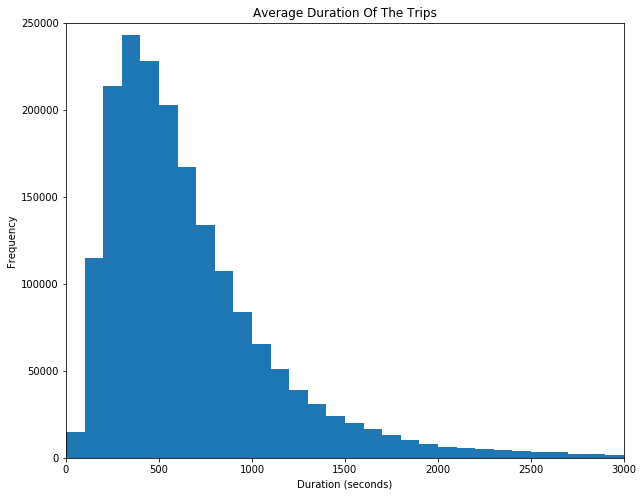

In [10]:
bin_edges = np.arange(0, df['duration_sec'].max()+100, 100);
plt.figure(figsize = [10, 8])
plt.hist(data = df, x = 'duration_sec', bins = bin_edges)

plt.xlim(0,3000)
plt.ylim(0,250000)

plt.title("Average Duration Of The Trips")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show();

> As we can see the plot is right-skewed. Because there is lots of points with low values and very long tail of data points with large values so we need a log transformation

In [11]:
# To check the min and max
np.log10(df['duration_sec'].describe())

count    6.270381
mean     2.933134
std      3.374818
min      1.785330
25%      2.544068
50%      2.745075
75%      2.940516
max      4.936343
Name: duration_sec, dtype: float64

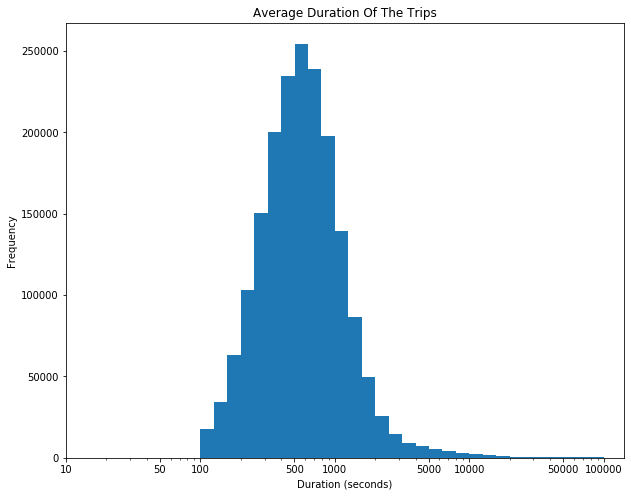

In [12]:
bin_edges = 10**np.arange( 2 , 5+0.1 , 0.1)
plt.figure(figsize = [10, 8])
tick_locs =  [ 10 , 50, 100, 500, 1000, 5000, 10000,50000,100000]
labels = ['{}'.format(v) for v in tick_locs]
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges);

plt.xscale('log');
plt.xticks(tick_locs,labels);
plt.title("Average Duration Of The Trips")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show();

> Now it looks more normally distributed. The majority of the trips are almost taken 600 hundred seconds which we can consider it short time

#### 2.What is the distribution of the user type  variable?

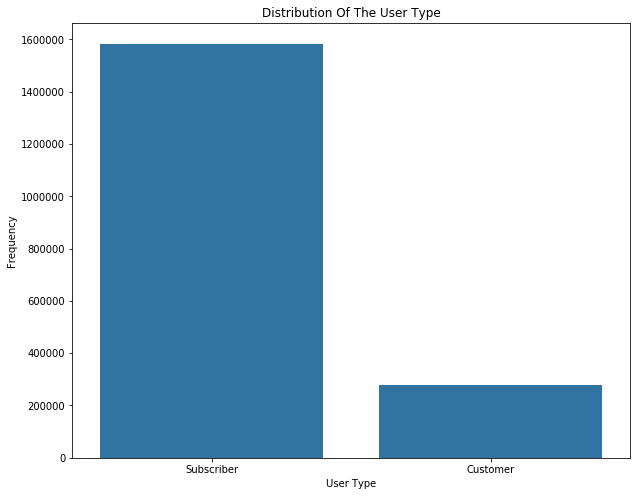

In [13]:
plt.figure(figsize = [10, 8])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color);
plt.title("Distribution Of The User Type")
plt.xlabel("User Type")
plt.ylabel("Frequency")
plt.show();

> Subscriber is the most frequent

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The average duration of the trips was normally distributed and I needed log transformation to do it. For the user type the subscribers were much more than customers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As I said before just for the duration variable at the begging it has right-skewed distribution and I solve it by using log transformation. The data was clean and tidy

<a id='Bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables 

#### 3.What is the relationship between all numeric variables?

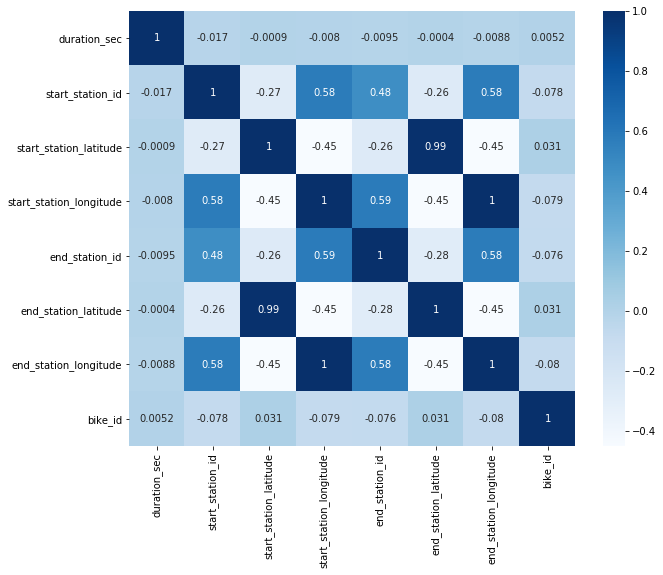

In [14]:
plt.figure(figsize = [10, 8])
sb.heatmap(df.corr(), annot = True,cmap = 'Blues')
plt.show()

> Here in the heatmap plot there are lots of negative correlation and few strong correlation

#### 4.Most frequent month for both subscriber and customer?

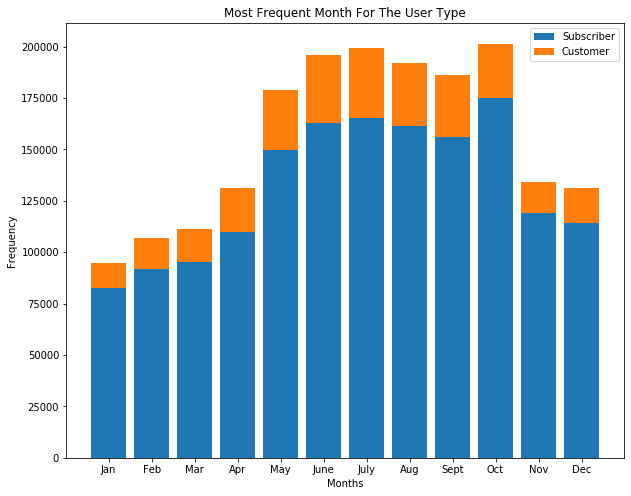

In [15]:
cat1_order = ['Jan', 'Feb', 'Mar', 'Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
cat2_order = ['Subscriber', 'Customer']
plt.figure(figsize = [10, 8])
baselines = np.zeros(len(cat1_order))

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['user_type'] == cat2]['month'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines )
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order);
plt.title("Most Frequent Month For The User Type")
plt.xlabel("Months")
plt.ylabel("Frequency");

> October is the most frequent month for the subscriber. For the customer June, July and Augest and least frequent month was January for both

#### 5.Relationship between seasons and the trip duration in hours?

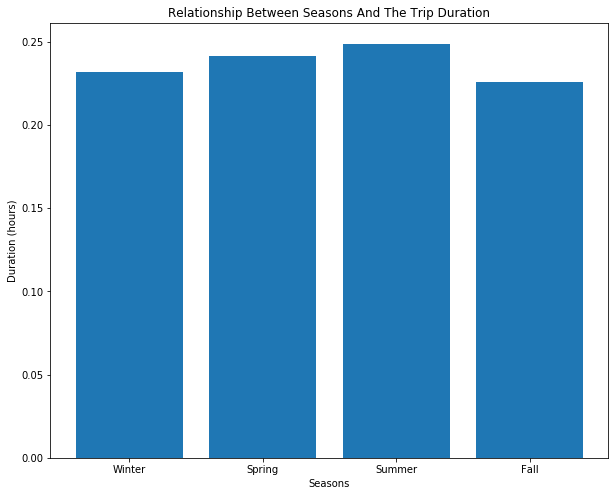

In [16]:
df['duration_hours'] = df['duration_sec'] / 3600

winter = df.query('month in ["Dec" , "Jan" , "Feb"]' ).duration_hours.mean()
spring = df.query('month in ["Mar" , "Apr" , "May"]' ).duration_hours.mean ()
summer = df.query('month in ["June" , "July" , "Aug"] ').duration_hours.mean()
fall = df.query('month in ["Sept" , "Nov" , "Dec"] ').duration_hours.mean()

plt.figure(figsize=[10,8])
plt.bar(['Winter','Spring','Summer','Fall'],[winter , spring , summer , fall] )
plt.title("Relationship Between Seasons And The Trip Duration")
plt.xlabel("Seasons")
plt.ylabel("Duration (hours)");

> Almost all of the seasons were close to each other and most of the trips reached 24 minute 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I notice that in general, the subscriber has more trips than customers through all months. The distribution for the subscribers vary but for the customer, they were very close

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the seasons plot even though the seasons were close to each other but there is slightly different that Summer season has the longest trip duration

<a id='Multivariate'></a>
## Multivariate Exploration

> In this section, investigate relationships between three or more  variables

#### The longest trip duration per month for both subscriber and customer?

/Users/ghadialowaimer/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


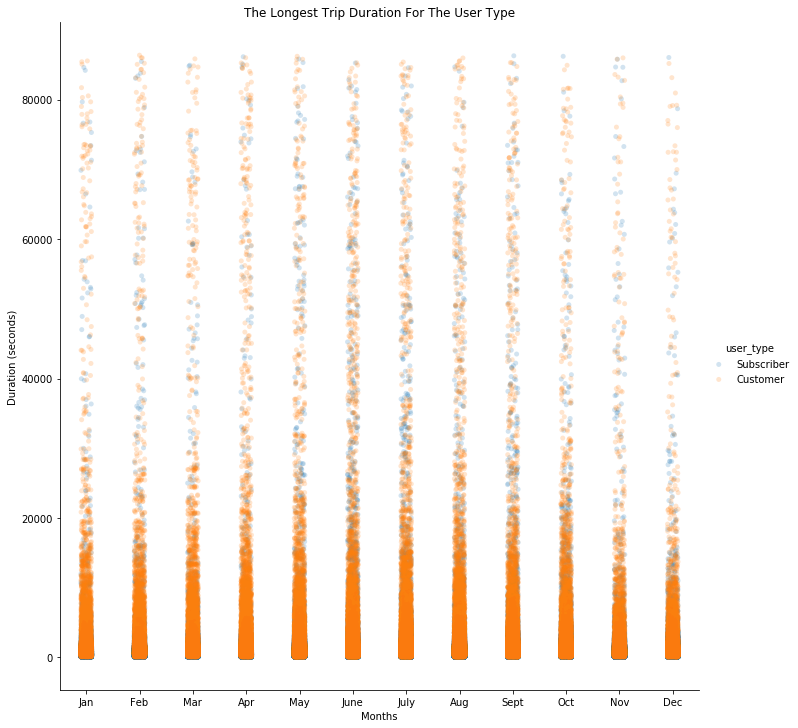

In [17]:
lo = sb.FacetGrid(data =  df, hue = 'user_type', height = 10)
lo.map(sb.stripplot, 'month','duration_sec', alpha = 1/5 )
lo.add_legend();
plt.title("The Longest Trip Duration For The User Type")
plt.xlabel("Months")
plt.ylabel("Duration (seconds)");

> As we can see that customer through all of the months has longer trips duration than subscriber

#### Rush time per month for weekdays?

In [18]:
weekday={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

df['start_time'] = pd.to_datetime(df['start_time'])
df['weekday'] = df['start_time'].dt.dayofweek.map(weekday)
 
df['weekday'].value_counts()

Tue    319332
Wed    316374
Thu    314124
Mon    294573
Fri    290390
Sat    175614
Sun    153314
Name: weekday, dtype: int64

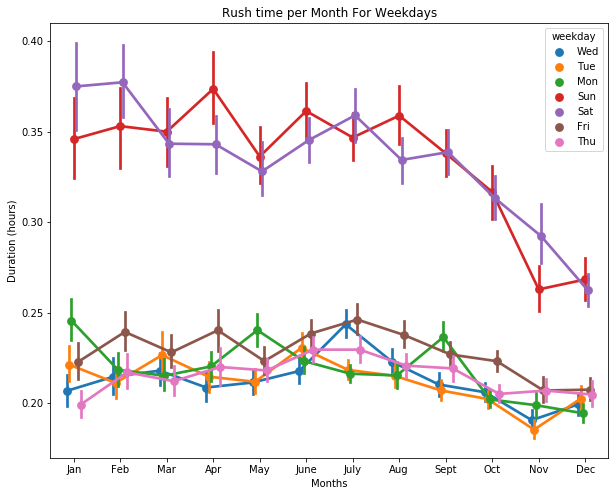

In [19]:
plt.figure(figsize=[10,8])
sb.pointplot(data=df,x='month',y='duration_hours',hue='weekday', dodge = 0.3 )
plt.title("Rush time per Month For Weekdays")
plt.xlabel("Months")
plt.ylabel("Duration (hours)");

> Sunday and Saturday in the first months of the year the rush time was approximate about 35 minute to 40 minute after it's open

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the first plot the customer has longer trips duration than subscriber through all of the months

### Were there any interesting or surprising interactions between features?

> In the second plot with the weekdays varible it has an impact on the result for the months because I found that the rush time at begging of the year months and in two days unlike before with user type was in the October